# 3. Polynomial Regression

### 공부 시간에 따른 시험 점수 (우등생)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## 3-1. 단순 선형 회귀 (Simple Linear Regression)

In [3]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y) #전체 데이터로 학습

LinearRegression()

### 데이터 시각화 (전체)

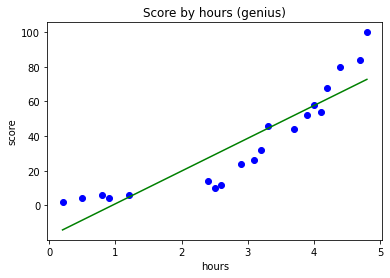

In [4]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, reg.predict(X), color = 'green') # 선 그래프
plt.title("Score by hours (genius)") # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # y 축 이름
plt.show()

In [5]:
reg.score(X,y) # 전체 데이터를 통한 모델 평가

0.8169296513411765

## 3-2. 다항 회귀 (Polynomial Regression)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=12) # 2차
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # [x] -> [x^0, x^1, x^2] -> x 가 3이라면 [1, 3, 9] 으로 변환

array([[1.00000000e+00, 2.00000000e-01, 4.00000000e-02, 8.00000000e-03,
        1.60000000e-03, 3.20000000e-04, 6.40000000e-05, 1.28000000e-05,
        2.56000000e-06, 5.12000000e-07, 1.02400000e-07, 2.04800000e-08,
        4.09600000e-09],
       [1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
        6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
        3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
        2.44140625e-04],
       [1.00000000e+00, 8.00000000e-01, 6.40000000e-01, 5.12000000e-01,
        4.09600000e-01, 3.27680000e-01, 2.62144000e-01, 2.09715200e-01,
        1.67772160e-01, 1.34217728e-01, 1.07374182e-01, 8.58993459e-02,
        6.87194767e-02],
       [1.00000000e+00, 9.00000000e-01, 8.10000000e-01, 7.29000000e-01,
        6.56100000e-01, 5.90490000e-01, 5.31441000e-01, 4.78296900e-01,
        4.30467210e-01, 3.87420489e-01, 3.48678440e-01, 3.13810596e-01,
        2.82429536e-01],
       [1.00000000e+00, 1.20000000e+

In [7]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [8]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10', 'x0^11', 'x0^12'], dtype=object)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y) #변환된 X와 y를 가지고 모델 생성 (학습)

LinearRegression()

### 데이터 시각화 (변환된 X와 y)

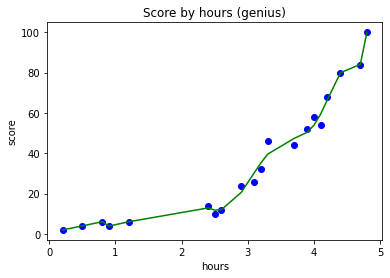

In [10]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)), color = 'green') # 선 그래프
plt.title("Score by hours (genius)") # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # y 축 이름
plt.show()

In [11]:
X_range = np.arange(min(X), max(X), 0.1) # X의 최소값에서 최대값까지의 범위를 0.1 단위로 잘라서 데이터 생성

In [12]:
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [13]:
X_range.shape

(46,)

In [14]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [15]:
X.shape

(20, 1)

In [16]:
X_range = X_range.reshape(-1, 1) # row 개수는 자동으로 계산, column 개수는 1개
X_range.shape

(46, 1)

In [17]:
X_range[:5]

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6]])

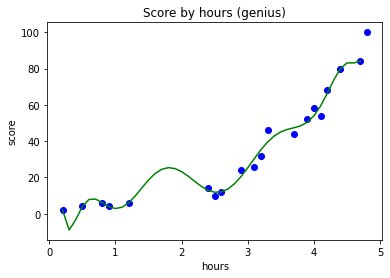

In [18]:
plt.scatter(X, y, color = 'blue') # 산점도
plt.plot(X_range, lin_reg.predict(poly_reg.fit_transform(X_range)), color = 'green') # 선 그래프
plt.title("Score by hours (genius)") # 제목
plt.xlabel('hours') # X 축 이름
plt.ylabel('score') # y 축 이름
plt.show()

### 공부 시간에 따른 시험 성적 예측

In [19]:
reg.predict([[2]]) # 2시간을 공부했을 때 선형 회귀 모델의 예측

array([19.85348988])

In [20]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간을 공부했을 때 다항 회귀 모델의 예측

array([23.15347833])

In [21]:
lin_reg.score(X_poly, y) # 전체 데이터를 통한 모델 평가

0.9914616287267866